## **Table of Contents**

1. Setting Up the Environment  
2. Loading the Dataset  
3. Exploring the Dataset  
4. Data Cleaning  
5. Performing Data Analysis  
6. Visualizing the Data  
7. Overcoming Common Challenges  
8. Customization Options  
9. Conclusion


---

## 1. Setting Up the Environment

### **Import Libraries**

Let's start by importing the necessary libraries. These libraries provide powerful functions for data manipulation and visualization.

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
import chardet

# Optional: Set styles for seaborn
sns.set(style='whitegrid')
%matplotlib inline

---

## **2. Load Data**

In [3]:
# Step 1: Open and read the JSON file
with open('D:/00 Anh/Learning/AI-Python-for-Beginners/zillow/fields_per_level.json', 'r') as file:
    data = json.load(file)

# Step 2: Pretty print the JSON data
pretty_json = json.dumps(data, indent=4)
print(pretty_json)

{
    "City": [
        "Date",
        "InventoryRaw_AllHomes",
        "InventorySeasonallyAdjusted_AllHomes",
        "MedianListingPricePerSqft_1Bedroom",
        "MedianListingPricePerSqft_2Bedroom",
        "MedianListingPricePerSqft_3Bedroom",
        "MedianListingPricePerSqft_4Bedroom",
        "MedianListingPricePerSqft_5BedroomOrMore",
        "MedianListingPricePerSqft_AllHomes",
        "MedianListingPricePerSqft_CondoCoop",
        "MedianListingPricePerSqft_DuplexTriplex",
        "MedianListingPricePerSqft_SingleFamilyResidence",
        "MedianListingPrice_1Bedroom",
        "MedianListingPrice_2Bedroom",
        "MedianListingPrice_3Bedroom",
        "MedianListingPrice_4Bedroom",
        "MedianListingPrice_5BedroomOrMore",
        "MedianListingPrice_AllHomes",
        "MedianListingPrice_CondoCoop",
        "MedianListingPrice_DuplexTriplex",
        "MedianListingPrice_SingleFamilyResidence",
        "MedianPctOfPriceReduction_AllHomes",
        "MedianPctOfPriceR

In [27]:
# Check if price to income is in any of the fields
words_to_check = ["Income", "income"]

if any(word in pretty_json for word in words_to_check):
    print("The string contains at least one of the words from the list.")
else:
    print("The string does not contain any of the words from the list.")

The string does not contain any of the words from the list.


In [6]:
dic_path = 'D:/00 Anh/Learning/AI-Python-for-Beginners/zillow/DataDictionary.csv'

with open(dic_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

dic = pd.read_csv(dic_path, encoding=encoding)
print(dic)

['Variable', 'Definition']


In [2]:
# Load data
county = 'D:/00 Anh/Learning/AI-Python-for-Beginners/zillow/County_time_series.csv'
county = pd.read_csv(file_path)

In [7]:
# Load data
folder_path = 'D:/00 Anh/Learning/AI-Python-for-Beginners/zillow'
exclude_file = 'DataDictionary.csv'
all_files = glob.glob(os.path.join(folder_path, "*.csv"))
files_to_concatenate = [f for f in all_files if os.path.basename(f) != exclude_file]

# Read and concatenate the CSV files
df_list = [pd.read_csv(file) for file in files_to_concatenate]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

C:\Users\huynq\AppData\Local\Temp\ipykernel_18332\1641242518.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in files_to_concatenate]


In [7]:
combined=pd.read_csv('combined_file.csv')

C:\Users\huynq\AppData\Local\Temp\ipykernel_17624\2228252705.py:1: DtypeWarning: Columns (0,1,2,3,4,5,85,86,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  combined=pd.read_csv('combined_file.csv')


In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613159 entries, 0 to 10613158
Columns: 112 entries, Unique_City_ID to InventoryTierShare_TopTier_AllHomes
dtypes: float64(102), object(10)
memory usage: 8.9+ GB


In [17]:
pd.set_option('display.max_columns', None)
print(combined)

                 Unique_City_ID            City     County State        Date  \
0          oak_grovechristianky       Oak Grove  Christian    KY         NaN   
1         jarvisburgcurritucknc      Jarvisburg  Currituck    NC         NaN   
2          mcminnvilleyamhillor     McMinnville    Yamhill    OR         NaN   
3          union_townshiperiepa  Union Township       Erie    PA         NaN   
4            oshkoshwinnebagowi         Oshkosh  Winnebago    WI         NaN   
...                         ...             ...        ...   ...         ...   
10613154                    NaN             NaN        NaN   NaN  2017-12-31   
10613155                    NaN             NaN        NaN   NaN  2017-12-31   
10613156                    NaN             NaN        NaN   NaN  2017-12-31   
10613157                    NaN             NaN        NaN   NaN  2017-12-31   
10613158                    NaN             NaN        NaN   NaN  2017-12-31   

         RegionName  InventorySeasonall

In [ ]:
print(combined.dtypes)

In [11]:
combined.head()

,Unique_City_ID,City,County,State,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,...,PctOfListingsWithPriceReductionsSeasAdj_TopTier,PctOfListingsWithPriceReductions_BottomTier,PctOfListingsWithPriceReductions_MiddleTier,PctOfListingsWithPriceReductions_TopTier,Sale_Counts_Msa,Sale_Counts_Seas_Adj_Msa,Sale_Prices_Msa,InventoryTierShare_BottomTier_AllHomes,InventoryTierShare_MiddleTier_AllHomes,InventoryTierShare_TopTier_AllHomes
0,oak_grovechristianky,Oak Grove,Christian,KY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,union_townshiperiepa,Union Township,Erie,PA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
combined['Date']

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
               ...    
10613154    2017-12-31
10613155    2017-12-31
10613156    2017-12-31
10613157    2017-12-31
10613158    2017-12-31
Name: Date, Length: 10613159, dtype: object

In [16]:
type(combined['Date'])

pandas.core.series.Series

In [11]:
# Get the names of all the columns of these files
# df_list = []
for file in files:
    df = pd.read_csv(file)
    print(f"Columns in {file}: {df.columns.tolist()}")
    # df_list.append(df)

Columns in D:/00 Anh/Learning/AI-Python-for-Beginners/zillow\cities_crosswalk.csv: ['Unique_City_ID', 'City', 'County', 'State']
Columns in D:/00 Anh/Learning/AI-Python-for-Beginners/zillow\City_time_series.csv: ['Date', 'RegionName', 'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes', 'MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom', 'MedianListingPricePerSqft_4Bedroom', 'MedianListingPricePerSqft_5BedroomOrMore', 'MedianListingPricePerSqft_AllHomes', 'MedianListingPricePerSqft_CondoCoop', 'MedianListingPricePerSqft_DuplexTriplex', 'MedianListingPricePerSqft_SingleFamilyResidence', 'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom', 'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom', 'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes', 'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex', 'MedianListingPrice_SingleFamilyResidence', 'MedianPctOfPriceReduction_Al

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 3745: invalid start byte

In [20]:
# Concatenate the DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Display or save the combined DataFrame
print(combined_df)
combined_df.to_excel('combined_output.xlsx', index=False)

                Unique_City_ID            City     County State        Date  \
0         oak_grovechristianky       Oak Grove  Christian    KY         NaN   
1        jarvisburgcurritucknc      Jarvisburg  Currituck    NC         NaN   
2         mcminnvilleyamhillor     McMinnville    Yamhill    OR         NaN   
3         union_townshiperiepa  Union Township       Erie    PA         NaN   
4           oshkoshwinnebagowi         Oshkosh  Winnebago    WI         NaN   
...                        ...             ...        ...   ...         ...   
4309837                    NaN             NaN        NaN   NaN  2017-12-31   
4309838                    NaN             NaN        NaN   NaN  2017-12-31   
4309839                    NaN             NaN        NaN   NaN  2017-12-31   
4309840                    NaN             NaN        NaN   NaN  2017-12-31   
4309841                    NaN             NaN        NaN   NaN  2017-12-31   

        RegionName  InventorySeasonallyAdjusted_All

ValueError: This sheet is too large! Your sheet size is: 4309842, 96 Max sheet size is: 1048576, 16384

### **View the Data**

In [12]:
# Display the first 5 rows
county.head(10)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1996-04-30,1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,89400.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1996-04-30,1055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,71300.0,71300.0,126700.0,NaN,NaN,NaN,NaN,NaN
7,1996-04-30,1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56400.0,NaN,92600.0,92600.0,172900.0,NaN,NaN,NaN,NaN,NaN
8,1996-04-30,1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,74700.0,72700.0,72700.0,149900.0,NaN,NaN,NaN,NaN,NaN
9,1996-04-30,1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

## **3\. Exploring the Dataset**

Understanding the structure and content of your data is crucial before any analysis.

### **Data Structure Information**

In [12]:
# Get information about the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### **Check for Missing Values**

In [14]:
# Check for null values
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
# Count number of fraud cases
fraud['isFraud'].sum()

8213

### **Statistical Summary**

In [17]:
# Get statistical summary
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## **4\. Data Cleaning**

### **Handle Missing Values**


In [19]:
# Drop rows with missing values (if any)
fraud.dropna(inplace=True)

### **Data Types Verification**

Ensure that all data types are appropriate for analysis.

In [14]:
# Verify data types
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [29]:
fraud['step'] = fraud['step'].astype(str)

## **5\. Performing Data Analysis**

Now, let's explore analyzing the data to extract meaningful insights.

### **Analyzing Variable Distributions**

#### **Distribution of Amount**

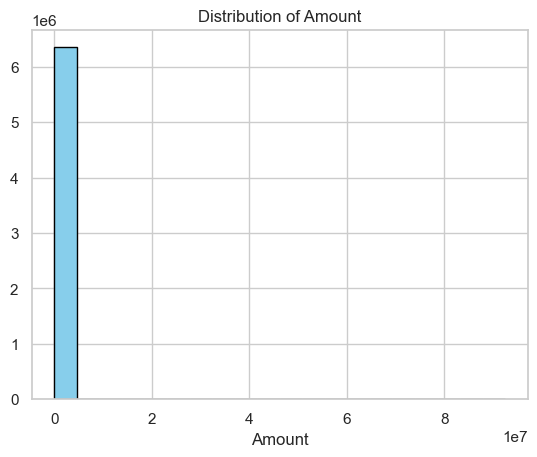

In [21]:
# Distribution of sepal length
plt.hist(fraud['amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
# plt.ylabel('Frequency')
plt.show()

### **Analyzing Relationships Between Variables**

#### **Sepal Length vs. Petal Length**

In [ ]:
# Scatter plot of sepal length vs. petal length
plt.scatter(df['sepal_length'], df['petal_length'], c='purple')
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

*Observation*: Do you see a correlation between sepal length and petal length from this representation? Ask the [course assistant](https://learn.deeplearning.ai/courses/ai-python-for-beginners-c3/lesson/2/using-files-in-python) to explore more!

### **Grouping and Aggregation**

#### **Mean Measurements by Species**

In [ ]:
# Mean measurements by species
df.groupby('species').mean()

* This reveals differences in measurements between species.

---

## **6\. Visualizing the Data**

Visualization aids in understanding complex data patterns.

### **Bar Plots**

#### **Average Sepal Length per Species**

In [ ]:
# Average sepal length per species
df.groupby('species')['sepal_length'].mean().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Average Sepal Length per Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

### **Box Plots**

#### **Petal Length Distribution by Species**
Now, let's create a box plot to visualize the distribution of petal lengths across different species.

In [ ]:
# Box plot for petal length by species
sns.boxplot(x='species', y='petal_length', data=df, palette='pastel')
plt.title('Petal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

*Insight*: Box plots are great for visualizing spread and identifying outliers.

### **Pair Plots**

Pair plots show relationships between all pairs of variables. This is particularly useful for multi-dimensional datasets like ours.

In this section, we'll create a pair plot of our Iris dataset. You might see some warnings when running this code, but don't worry - they're related to some internal Seaborn functions and don't affect our results.

Here's what our code will do:
1. Temporarily suppress warnings to keep our output clean.
2. Create a pair plot with different colors for each species.
3. Display the plot.
4. Reset the warnings to their default behavior.

Let's run the code and see what insights we can gain from this visualization!

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Pair plot of all variables colored by species
sns.pairplot(df, hue='species')
plt.show()

# Reset warnings to default behavior
warnings.resetwarnings()

*Pro Tip*: Pair plots provide a matrix of scatter plots, helping you see relationships between all pairs of variables.

### Heatmaps

Finally, let's create a heatmap to visualize the correlation between different features.

**Explanation:**
- `df.select_dtypes(include='number')`: This function filters the original dataframe `df` to include only the numeric columns. Columns that contain non-numeric data, such as categorical variables like `species`, are automatically excluded. This ensures that the correlation matrix only includes variables that can be meaningfully compared numerically.
  
- `numeric_df.corr()`: This function calculates the correlation matrix of the numeric features. The correlation matrix shows how strongly different variables are related to each other. The values range from -1 to 1, where:
  - `1` indicates a perfect positive correlation (as one feature increases, the other increases proportionally),
  - `-1` indicates a perfect negative correlation (as one feature increases, the other decreases),
  - `0` means no correlation.
  
- The heatmap provides a visual representation of these correlations, using colors to indicate the strength of the relationships. Warmer colors (red) indicate stronger positive correlations, while cooler colors (blue) show stronger negative correlations.

This method makes it easier to spot patterns and relationships between variables at a glance.

In [ ]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

---

## 7. Challenge: Mismatched Column Names

**Scenario**: If you downloaded the dataset from another source (like [Kaggle](https://www.kaggle.com/datasets/vikrishnan/iris-dataset)), the column names might differ (e.g., 'sepallength' instead of 'sepal_length'). This can cause issues when following the tutorial.

### Solution: Renaming Columns

You can rename the columns to match the expected names using the `rename` function in pandas. Make sure you specify the correct mappings for the column names to ensure the rest of the tutorial works seamlessly.

In [ ]:
# Check current column names
print(df.columns)

Suppose the columns are:

In [ ]:
# Check current column names
print(df.columns)

# Rename columns to match expected format (if required)
df.rename(columns={
    'sepallength': 'sepal_length',
    'sepalwidth': 'sepal_width',
    'petallength': 'petal_length',
    'petalwidth': 'petal_width'
}, inplace=True)

# Verify the column renaming
print(df.columns)

*Fun Fact*: You can use the `str.replace()` method for more complex renaming tasks.

#### **Using an LLM to Assist**

You can use an AI language model (LLM) to help generate code for renaming columns. Feel free to [use the classroom chat!](https://learn.deeplearning.ai/courses/ai-python-for-beginners-c3/lesson/2/using-files-in-python)

**Sample Prompt to LLM**:

*"I have a DataFrame with columns named 'sepallength', 'sepalwidth', 'petallength', 'petalwidth', and 'species'. I want to rename them to 'sepal\_length', 'sepal\_width', 'petal\_length', 'petal\_width', and 'species'. How can I do this in pandas?"*

**LLM Response**:

In [ ]:
# Rename columns to include underscores
df.rename(columns={
    'sepallength': 'sepal_length',
    'sepalwidth': 'sepal_width',
    'petallength': 'petal_length',
    'petalwidth': 'petal_width'
}, inplace=True)

# Verify the updated column names
print(df.columns)

### **Challenge: Different Data Formats**

If the data types are not as expected (e.g., numerical data stored as strings), you may need to convert them.

#### **Solution: Converting Data Types**

In [ ]:
# Convert columns to numeric types
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

---

## **8\. Customization Options**

Make this project your own\!

### **8.1 Using Your Own Dataset**

Replace the Iris dataset with your own data.

*Note: Running this cell will produce an error if you do not load your own data. Errors are okay! It's all part of the process!*

In [ ]:
# Load your own dataset
df = pd.read_csv('path_to_your_dataset.csv')

# Preview the data
df.head()

*Tip*: Ensure your dataset is in a compatible format (like CSV) and that you understand its structure.

### **8.2 Enhancing Visualizations**

#### **Customizing Plots**

In [ ]:
# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="seaborn")

# Customized scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df, s=100)
plt.title('Sepal Length vs Petal Length by Species', fontsize=16)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.legend(title='Species')
plt.show()

*Did You Know?*: You can change the marker style, size, and even add annotations to your plots!

### **8.3 Incorporating AI for Advanced Analysis**

Use AI models for predictive analytics, clustering, or natural language processing.

#### **Example: Using LLMs for Data Insights**

*Note*: **Integrating AI tools will require additional setup and API keys.**

You can leverage LLMs to generate insights or summaries. If you have a developer API key from an LLM provider, try it out below!

In [ ]:
# Suppose you have a summary statistics string
summary = df.describe().to_string()

# Use an LLM to interpret the summary
# (Assuming you have an API or function to interact with the LLM)
def get_insights_from_summary(summary_text):
    # This is a placeholder function
    # Replace with actual API call or LLM interaction
    insights = "LLM-generated insights based on the summary."
    return insights

insights = get_insights_from_summary(summary)
print(insights)

### **8.4 Automating Reports**

Generating comprehensive reports that include both visualizations and textual analysis is a crucial skill in data analysis. Automation can save time, ensure consistency, and allow for easy updates as new data becomes available. Here's an expanded guide on how to automate your reporting process:

#### Structuring Your Report

Before automating, plan your report structure. A typical data analysis report might include:

Executive Summary
Introduction
Data Overview
Detailed Analysis (with visualizations)
Insights and Findings
Conclusions and Recommendations


#### Generating Visualizations

Use matplotlib and seaborn to create your visualizations programmatically. Save each plot as an image file:

In [ ]:
def create_and_save_plot(df, x, y, hue, filename):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.title(f'{y} vs {x} by {hue}')
    plt.savefig(filename)
    plt.close()

create_and_save_plot(df, 'sepal_length', 'petal_length', 'species', 'sepal_vs_petal.png')

# Quick Guide: Where Are My Generated Files?

When you run the report generation script, it creates two important files:

1. `sepal_vs_petal.png`: A scatter plot image
2. `report.csv`: A text file containing the report

But where exactly are these files saved? Here's a quick guide to help you find them:

## Default Save Location

By default, the files are saved in your **current working directory**. This is usually:

- The folder where your Python script is located (if you're running a .py file)
- The folder where your Jupyter Notebook is saved (if you're using Jupyter)

## How to Find Your Files

1. **Look in the same folder** as your Python script or Jupyter Notebook.

2. If you can't find the files there, you can get the full path of the current working directory by running this Python code:

   ```python
   import os
   print(os.getcwd())
   ```

3. Copy the path that's printed and paste it into your file explorer. This will take you directly to the folder where the files are saved.

## Tips for Different Environments

- **Jupyter Notebook**: The files will typically be visible in the Jupyter file browser.
- **IDEs** (like PyCharm or VS Code): Check the project directory or the directory you opened the IDE in.
- **Command Line**: The files will be in the directory you were in when you ran the script.

## Still Can't Find Your Files?

If you're still having trouble, try:

1. Searching for files named "sepal_vs_petal.png" and "report.csv" on your computer.
2. Checking if your script has permission to write files in the current directory.
3. Making sure the script ran successfully without any errors.

Remember, understanding where your files are saved is an important part of working with data and generating reports. Don't hesitate to refer to the class chatbot for help if you're stuck!

#### 3. Generating Textual Analysis

Use Python's string formatting to create textual analysis based on your data:

In [ ]:
def generate_summary_stats(df):
    summary = df.describe()
    return f"""
    Data Summary:
    - Number of samples: {summary.loc['count', 'sepal_length']}
    - Average sepal length: {summary.loc['mean', 'sepal_length']:.2f} cm
    - Average petal length: {summary.loc['mean', 'petal_length']:.2f} cm
    - Min sepal length: {summary.loc['min', 'sepal_length']:.2f} cm
    - Max sepal length: {summary.loc['max', 'sepal_length']:.2f} cm
    - Min petal length: {summary.loc['min', 'petal_length']:.2f} cm
    - Max petal length: {summary.loc['max', 'petal_length']:.2f} cm
    """

# Assuming df is your DataFrame, e.g., the Iris dataset
# If you haven't loaded it yet, you can use:
# url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
# df = pd.read_csv(url)

# Generate the summary
summary_text = generate_summary_stats(df)

# Display the summary in the notebook or console
print(summary_text)

# Optionally, save the summary to a text file
with open('dataset_summary.txt', 'w') as f:
    f.write(summary_text)

print("Summary has been saved to 'dataset_summary.txt'")

# You can also add the summary to your DataFrame as a new column
df['summary'] = summary_text

# Display the first few rows of the updated DataFrame
print(df.head())

#### Combining Text and Visuals

Use a library like fpdf or reportlab to create a PDF report. Here's an example using fpdf:

In [ ]:
!pip install fpdf
from fpdf import FPDF

def create_report(title, summary, plot_filename):
    pdf = FPDF()
    pdf.add_page()

    # Add title
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, title, ln=True, align='C')

    # Add summary
    pdf.set_font("Arial", "", 12)
    pdf.multi_cell(0, 10, summary)

    # Add plot
    pdf.image(plot_filename, x=10, y=pdf.get_y()+10, w=190)

    pdf.output("report.pdf")

create_report("Iris Dataset Analysis", summary_text, "sepal_vs_petal.png")

Reminder: Your generated files (report.pdf and sepal_vs_petal.png) are saved in: {current_directory}"

In [ ]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df, s=100, ax=ax)

# Customize the plot
ax.set_title('Sepal Length vs Petal Length by Species', fontsize=16)
ax.set_xlabel('Sepal Length (cm)', fontsize=12)
ax.set_ylabel('Petal Length (cm)', fontsize=12)
ax.legend(title='Species')

# Save the plot
plt.savefig('iris_plot.png')

# Display the plot (optional, but useful to verify what's being saved)
plt.show()

print("Plot has been saved as 'iris_plot.png'")

Pro Tip: Take a look at using libraries like PDFKit or ReportLab for more polished reports.

---

## **9\. Conclusion**

Congratulations\! You've built a versatile data analysis and visualization tool.

### **Key Takeaways**

* **Data Loading and Cleaning**: Import data from various sources and prepare it for analysis.  
* **Exploratory Data Analysis**: Use statistical methods and visualizations to understand data.  
* **Visualization Techniques**: Create informative plots to communicate findings effectively.  
* **Problem-Solving Skills**: Overcome common challenges using tools like LLMs.  
* **Customization**: Adapt the tool to different datasets and requirements.

### **Next Steps**

* **Apply to Real-World Data**: Use this tool to analyze data relevant to your field or interests.  
* **Learn Advanced Techniques**: Explore machine learning models, time series analysis, or interactive dashboards.  
* **Share Your Work**: Publish your project on the community platform, or write a post on social media or blog to share insights.

---

## **💌 Feedback**

This is a pilot project, and we'd love your feedback! Please take our survey and let us know what you thought, and if you'd like more!

[Take survey!](https://docs.google.com/forms/d/e/1FAIpQLSc1jiWgLT6V99eO5wIwuXLtZ5ULVwo9mVMNEhwKregl7i37gA/viewform)

---

## **Additional Resources**

* **pandas Documentation**: pandas.pydata.org  
* **matplotlib Documentation**: matplotlib.org  
* **seaborn Documentation**: seaborn.pydata.org  
* **Plotly for Interactive Visualizations**: plotly.com/python  
* **Kaggle Datasets**: Kaggle  
* **UCI Machine Learning Repository**: [UCI Datasets](https://archive.ics.uci.edu/ml/index.php)

---

## **Tips and Best Practices**

* **Document Your Code**: Use comments and markdown cells to explain your code and findings.  
* **Version Control**: Use Git to track changes and collaborate with others.  
* **Backup Your Data**: Always keep a copy of your raw data before making changes.  
* **Stay Curious**: Explore different datasets and experiment with new libraries and techniques.

---

**By incorporating these enhancements and utilizing tools like LLMs, you're not only building a tool but also developing problem-solving skills that are essential in the data science field.**

**Keep learning!**